# Data Science Project - Predict the American population migration due to Climate Change (In Progress)

I am using the NASA NEX climate data: https://registry.opendata.aws/nasanex/ to predict the next population migration of the American population due to global warming and climate change.
Particularly, I want to focus on the evolution of temperature for a set of big US cities and see if the temperature becomes too high and if these cities' lives become challenging.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr #import Xarray 
import cartopy.crs as ccrs #import Cartopy

/opt/anaconda3/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


I downloaded the predictive data for the surface temperature and for year 2100.

In [2]:
ds = xr.open_dataset("2100.nc") #opening the dataset
ds #printing the information

/opt/anaconda3/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * time     (time) object 2100-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes: (12/34)
    parent_experiment:              historical
    parent_experiment_id:           historical
    parent_experiment_rip:          r1i1p1
    Conventions:                    CF-1.4
    institution:                    NASA Earth Exchange, NASA Ames Research C...
    institute_id:                   NASA-Ames
    ...                             ...
    project_id:                     NEXGDDP
    table_id:                       Table day (12 November 2010)
    source:                         BCSD 2014
    creation_date:                  2015-01-07T20:33:31Z
    forcing:                        N/A
    product:                        output

As an example, I want to look at the average temperature for New York City in 2100.

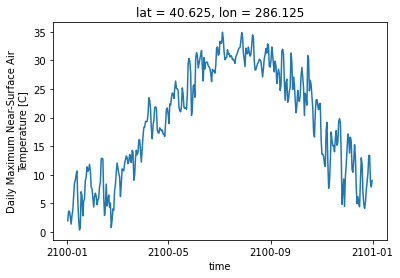

In [3]:
import numpy as np
latNY=np.where(ds['lat'].lat>=40.6) #I am selecting in the dataset the latitude and longitude of New York

longNY = np.where(ds['lon'].lon>=285.96)
#Because I will not find the exact latitude and Longitude, I use a "greater than" condition, and take the first element, which will be the closest to the latitude and Longitude I am looking for.
latNY =np.asarray(latNY)[0][0]
longNY = np.asarray(longNY)[0][0]
tasmax = ds.tasmax - 273.15 # changing from degree Kelvin to degree Celsius

tasmax.attrs = ds.tasmax.attrs
tasmax.attrs["units"] = "C"
temp1d = tasmax.isel(lat=latNY ,lon=longNY)
temp1d.plot() #plotting the annual temperature variation for New York City, predicted for 2100.

I want to do a movie to see the annual evolution of the predicted temperature above the US, for the year 2100.
To do so, I select a sub-array of data containing the US. I loop over 365 days, save the figures.
Remark: I am using the colormap "Viridis," which is colorblind-friendly.

In [4]:

for i in range(364):
    ax = plt.axes(projection=ccrs.PlateCarree()) #using Cartopy and the Plate Carree projection
    ax.coastlines() #adding the costlines
    #slicing the dataset over the US
    ds['tasmax'][i].sel(lon=slice(230, 300), lat=slice(20, 60)).plot(cmap='viridis', cbar_kwargs={'shrink': 0.8, 'label': 'Kelvin'})

    plt.savefig('Images/carte%03d.png'%(i)) #saving the figures
    plt.clf() #clearing the plot to avoid juxtaposition



<Figure size 432x288 with 0 Axes>

In [5]:
import os
import moviepy.video.io.ImageSequenceClip
from natsort import natsorted
image_folder='Images'
fps=24 #frame per second

image_files = [image_folder+'/'+img for img in os.listdir(image_folder) if img.endswith(".png")] #finding the saved pictures
image_files = natsorted(image_files,reverse=False) #Sorting the images in order (chronologicaly from January to December 2100)
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('Carte_video.mp4')



t:   4%|▍         | 16/364 [00:00<00:02, 157.27it/s, now=None]

Moviepy - Building video Carte_video.mp4.
Moviepy - Writing video Carte_video.mp4



Moviepy - Done !
Moviepy - video ready Carte_video.mp4


The video is attached in my repository

In [6]:
from IPython.display import Video

Video("Carte_video.mp4")

First conclusions: In NYC, it appears that the average temperature will reach 30 degrees in summer. It seems that the temperature will be unbearable and companies, the population will probably migrate outside the city.